# Procesos ETL
## Transformación

### Paso 1.
Importar Librerias

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import os
from extraccion import Extraccion as extra

## Paso 2.
Rutas de los insumos

In [63]:
extraccion = extra()

uri = "mongodb://localhost:27017/"
database = "bi_mx"
df_listings = extraccion.extraer_mongo_df(uri, database, "listings")
df_reviews = extraccion.extraer_mongo_df(uri, database, "reviews")
# df_calendar = extraccion.extraer_mongo_df(uri, database, "calendar")

## Exploración

## Previsualización de los datos

In [64]:
import logging

# Configuración básica del log
logging.basicConfig(
    level=logging.INFO,  # Nivel INFO para mensajes generales
    format='%(asctime)s - %(levelname)s - %(message)s'
)

logging.info("Mostrando las primeras filas del DataFrame 'listings'...")
print(df_listings.head())  # Muestra las primeras 5 filas del DataFrame de anuncios

2025-10-15 11:30:30,945 - INFO - Mostrando las primeras filas del DataFrame 'listings'...


                        _id     id                         listing_url  \
0  68b24d712beebdf186a967c0  35797  https://www.airbnb.com/rooms/35797   
1  68b24d712beebdf186a967c1  44616  https://www.airbnb.com/rooms/44616   
2  68b24d712beebdf186a967c2  56074  https://www.airbnb.com/rooms/56074   
3  68b24d712beebdf186a967c3  67703  https://www.airbnb.com/rooms/67703   
4  68b24d712beebdf186a967c4  70644  https://www.airbnb.com/rooms/70644   

        scrape_id last_scraped           source  \
0  20250319150644   2025-03-21      city scrape   
1  20250319150644   2025-03-20  previous scrape   
2  20250319150644   2025-03-20      city scrape   
3  20250319150644   2025-03-20  previous scrape   
4  20250319150644   2025-03-22      city scrape   

                                               name  \
0                                       Villa Dante   
1                                      Condesa Haus   
2              Great space in historical San Rafael   
3                 2 bedroom 

In [65]:
logging.info("Mostrando las primeras filas del DataFrame 'reviews'...")
print(df_reviews.head())  # Muestra las primeras 5 filas del DataFrame de reseñas

2025-10-15 11:30:35,132 - INFO - Mostrando las primeras filas del DataFrame 'reviews'...


                        _id  listing_id        id       date  reviewer_id  \
0  68ef9f9dee4ad261006e7543    10257549  59265221 2016-01-08     31043833   
1  68ef9f9dee4ad261006e7544    10257549  59352234 2016-01-09      7248934   
2  68ef9f9dee4ad261006e7545    10257549  59456981 2016-01-10     52707457   
3  68ef9f9dee4ad261006e7546    10257549  59661086 2016-01-13     52989229   
4  68ef9f9dee4ad261006e7547    10257549  59806795 2016-01-15     51159033   

  reviewer_name                                           comments  
0       Karolis  The flat is very nice newly renovated. The hos...  
1         James  Benito and his wife were great guests. Perfect...  
2        Manuel  Fue algo express. No pude volar y contacté con...  
3         Annie  This was a very comfortable and conveniently l...  
4        Svenja  Nice place, really close to te airport - Nice ...  


In [ ]:
# logging.info("Mostrando las primeras filas del DataFrame 'calendar'...")
# print(df_calendar.head())  # Descomentarlo si quieres visualizar también el calendario

In [66]:
# Verificación de la estructura del DataFrame 'listings'
logging.info("Obteniendo información del DataFrame 'listings'...")
print(df_listings.info())  # Muestra el número de filas, columnas, tipos de datos y valores nulo


2025-10-15 11:30:37,120 - INFO - Obteniendo información del DataFrame 'listings'...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52468 entries, 0 to 52467
Data columns (total 77 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   _id                                           52468 non-null  object        
 1   id                                            52468 non-null  int64         
 2   listing_url                                   52468 non-null  object        
 3   scrape_id                                     52468 non-null  int64         
 4   last_scraped                                  52468 non-null  datetime64[ns]
 5   source                                        52468 non-null  object        
 6   name                                          52468 non-null  object        
 7   description                                   50933 non-null  object        
 8   neighborhood_overview                         28361 non-null  obje

In [36]:
# Verificación de la estructura del DataFrame 'reviews'
logging.info("Obteniendo información del DataFrame 'reviews'...")
print(df_reviews.info())  # Muestra detalles estructurales del DataFrame de reseñas

2025-10-15 10:27:59,987 - INFO - Obteniendo información del DataFrame 'reviews'...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1388226 entries, 0 to 1388225
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   _id            1388226 non-null  object        
 1   listing_id     1388226 non-null  int64         
 2   id             1388226 non-null  int64         
 3   date           1388226 non-null  datetime64[ns]
 4   reviewer_id    1388226 non-null  int64         
 5   reviewer_name  1388218 non-null  object        
 6   comments       1388226 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 74.1+ MB
None


In [ ]:
# logging.info("Obteniendo información del DataFrame 'calendar'...")
# print(df_calendar.info())  # Muestra la estructura del DataFrame del calendario

# Detección y manejo de valores Nulos

## Valores nulos o faltantes por columna.

In [67]:
# --- Análisis de valores nulos en cada DataFrame ---

# Verificación de valores nulos en df_listings
logging.info("Calculando valores nulos en el DataFrame 'listings'...")
print(df_listings.isnull().sum())  # Muestra la cantidad de valores nulos por columna

2025-10-15 11:35:01,709 - INFO - Calculando valores nulos en el DataFrame 'listings'...


_id                               0
id                                0
listing_url                       0
scrape_id                         0
last_scraped                      0
                               ... 
review_scores_checkin          6637
review_scores_communication    6637
review_scores_location         6637
review_scores_value            6637
reviews_per_month              6634
Length: 77, dtype: int64


In [42]:
# Verificación de valores nulos en df_reviews
logging.info("Calculando valores nulos en el DataFrame 'reviews'...")
print(df_reviews.isnull().sum())  # Muestra la cantidad de valores nulos por columna

2025-10-15 10:34:07,145 - INFO - Calculando valores nulos en el DataFrame 'reviews'...


_id              0
listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    8
comments         0
dtype: int64


In [43]:
# Verificación de valores nulos en df_calendar
# logging.info("Calculando valores nulos en el DataFrame 'calendar'...")
# print(df_calendar.isnull().sum())  # Muestra la cantidad de valores nulos por columna

In [51]:
# Calcula el porcentaje de valores nulos por columna en el DataFrame 'df_listings'
# .isnull() devuelve una matriz booleana (True si el valor es nulo)
# .mean() calcula la proporción de valores nulos (True=1, False=0)
# Multiplicar por 100 convierte esa proporción en porcentaje (%)
df_listings.isnull().mean()*100

_id                             0.000000
id                              0.000000
listing_url                     0.000000
scrape_id                       0.000000
last_scraped                    0.000000
                                 ...    
review_scores_checkin          12.649615
review_scores_communication    12.649615
review_scores_location         12.649615
review_scores_value            12.649615
reviews_per_month              12.643897
Length: 77, dtype: float64

In [52]:
df_reviews.isnull().mean()*100

_id              0.000000
listing_id       0.000000
id               0.000000
date             0.000000
reviewer_id      0.000000
reviewer_name    0.000576
comments         0.000000
dtype: float64

In [ ]:
# df_calendar.isnull().mean()*100

## Cantidad de valores nulos por columna

In [68]:
df_listings.isna().sum()

_id                               0
id                                0
listing_url                       0
scrape_id                         0
last_scraped                      0
                               ... 
review_scores_checkin          6637
review_scores_communication    6637
review_scores_location         6637
review_scores_value            6637
reviews_per_month              6634
Length: 77, dtype: int64

In [69]:
df_reviews.isna().sum()

_id              0
listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    8
comments         0
dtype: int64

In [ ]:
# df_calendar.isna().sum()

## Visualización gráfica de valores nulos

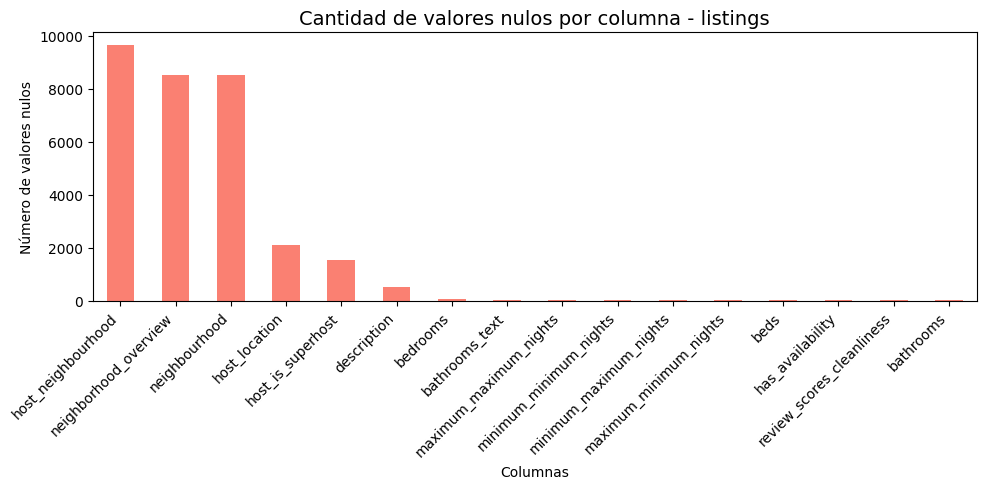

In [87]:
# Conteo de valores nulos - listings
na_count = df_listings.isna().sum()

plt.figure(figsize=(10, 5))
na_count[na_count > 0].sort_values(ascending=False).plot(kind='bar', color='salmon')
plt.title('Cantidad de valores nulos por columna - listings', fontsize=14)
plt.xlabel('Columnas')
plt.ylabel('Número de valores nulos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

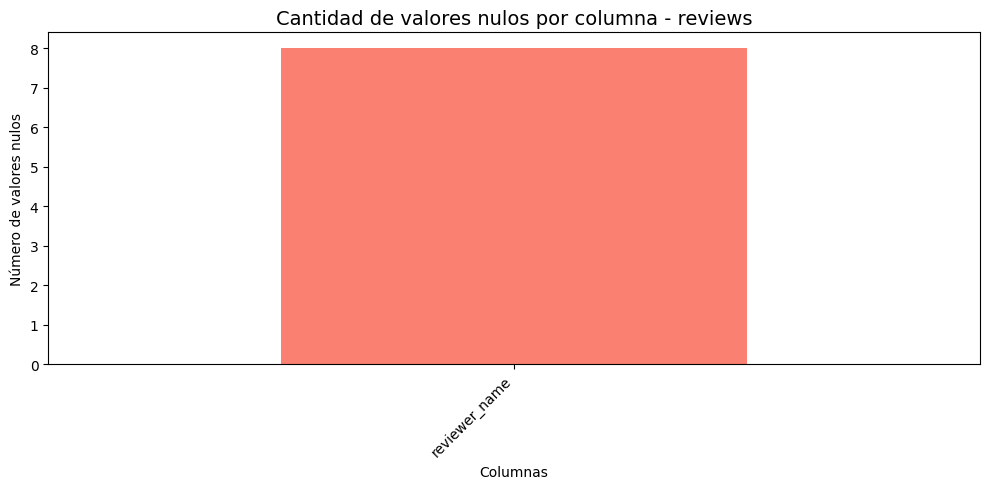

In [80]:
# Conteo de valores nulos - reviews
na_count = df_reviews.isna().sum()

plt.figure(figsize=(10, 5))
na_count[na_count > 0].sort_values(ascending=False).plot(kind='bar', color='salmon')
plt.title('Cantidad de valores nulos por columna - reviews', fontsize=14)
plt.xlabel('Columnas')
plt.ylabel('Número de valores nulos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Conteo de valores nulos
# na_count = df_calendar.isna().sum()

# plt.figure(figsize=(10, 5))
# na_count[na_count > 0].sort_values(ascending=False).plot(kind='bar', color='salmon')
# plt.title('Cantidad de valores nulos por columna', fontsize=14)
# plt.xlabel('Columnas')
# plt.ylabel('Número de valores nulos')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

## Eliminación de filas con valores nulos

In [76]:
df_listings.isna().sum()

_id                            0
id                             0
listing_url                    0
scrape_id                      0
last_scraped                   0
                              ..
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
reviews_per_month              0
Length: 77, dtype: int64

In [85]:
df_listings = df_listings.dropna(subset=['review_scores_checkin'])
df_listings = df_listings.dropna(subset=['picture_url'])
df_listings = df_listings.dropna(subset=['host_about'])
df_listings = df_listings.dropna(subset=['price'])

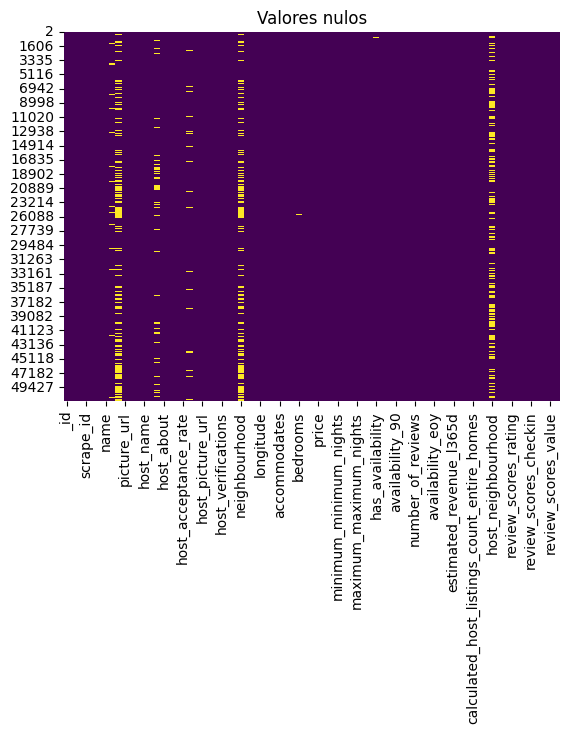

In [ ]:
sns.heatmap(df_listings.isna(), cbar=False, cmap='viridis')
plt.title('Valores nulos - listings')
plt.show()

In [89]:
df_reviews.isna().sum()

_id              0
listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    8
comments         0
dtype: int64

In [91]:
df_reviews = df_reviews.dropna(subset=['reviewer_name'])

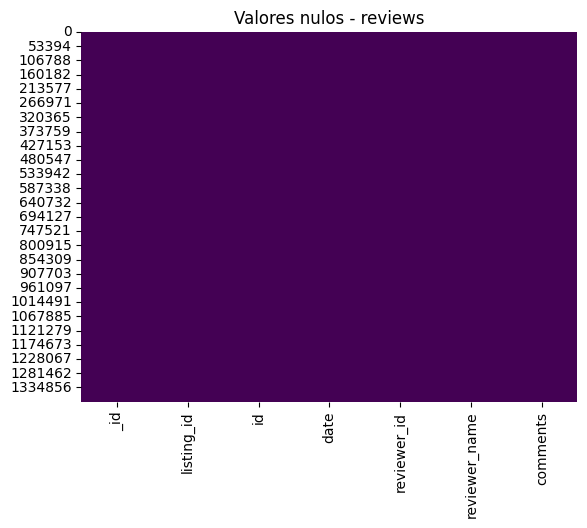

In [93]:
sns.heatmap(df_reviews.isna(), cbar=False, cmap='viridis')
plt.title('Valores nulos - reviews')
plt.show()

In [ ]:
# df_calendar.isna().sum()

In [ ]:
# df_calendar = df_calendar.dropna(subset=['reviewer_name'])

In [ ]:
# sns.heatmap(df_calendar.isna(), cbar=False, cmap='viridis')
# plt.title('Valores nulos - calendar')
# plt.show()

## Eliminación de filas o columnas con muchos valores nulos

In [39]:
ts = 0.5
df_meta_c = df_meta.dropna(thresh=int(ts * df_meta.shape[0]), axis=1)

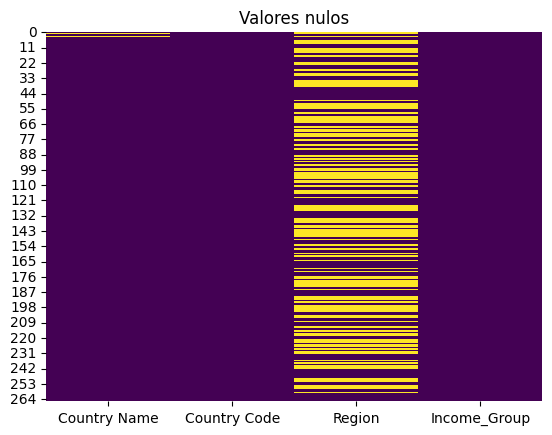

In [40]:
sns.heatmap(df_meta_c.isna(), cbar=False, cmap='viridis')
plt.title('Valores nulos')
plt.show()

### Imputación de valores faltantes en 'region' con 'Sin region'

In [41]:
df_meta_c.loc[:, 'Region'] = df_meta_c['Region'].fillna('Sin region')

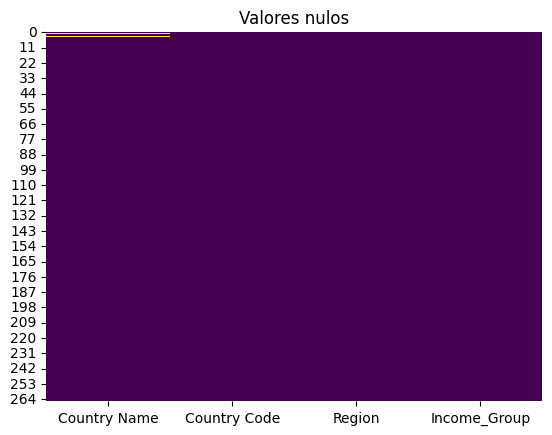

In [42]:
sns.heatmap(df_meta_c.isna(), cbar=False, cmap='viridis')
plt.title('Valores nulos')
plt.show()

## Detección de valores atípicos (outliers)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\DELL\AppData\Local\Temp\ipykernel_28156\1874021406.py:2: SyntaxWarning: invalid escape sequence '\$'
  df_listings['price'] = df_listings['price'].replace('[\$,]', '', regex=True).replace('', '0').astype(float)


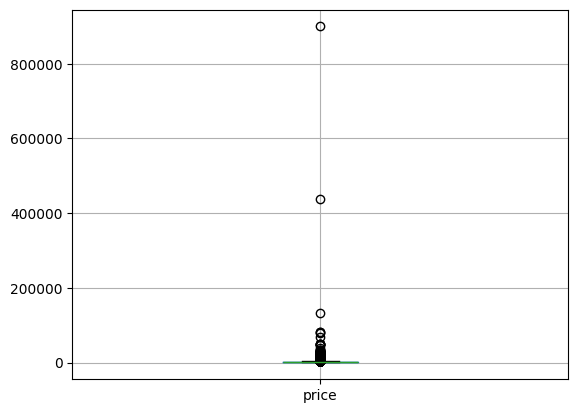

In [94]:
# Elimina el símbolo $ y las comas, y convierte a float
df_listings['price'] = df_listings['price'].replace('[\$,]', '', regex=True).replace('', '0').astype(float)
df_listings.boxplot(column='price')
plt.show()

# Eliminar duplicados

## Identificar Duplicados

In [43]:
dupli_rows = df_popu_c[df_popu_c.duplicated()]
print(f"Registros duplicados: {dupli_rows.shape[0]}")

Registros duplicados: 0


In [44]:
dupli_rows = df_meta_c[df_meta_c.duplicated()]
print(f"Registros duplicados: {dupli_rows.shape[0]}")

Registros duplicados: 0


# Limpiar nombres de columnas

### Ajuste de columnas de df_popu_c

In [45]:
print(df_popu_c.columns)

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       'year', 'total'],
      dtype='object')


In [46]:
df_popu_c.columns = ['country_name', 'country_code', 'indicator_name', 'indicator_code',
       'year', 'population']

In [47]:
print(df_popu_c.columns)

Index(['country_name', 'country_code', 'indicator_name', 'indicator_code',
       'year', 'population'],
      dtype='object')


### Ajuste de columnas de df_meta_c

In [48]:
print(df_meta_c.columns)

Index(['Country Name', 'Country Code', 'Region', 'Income_Group'], dtype='object')


In [49]:
df_meta_c.columns = ['country_name', 'country_code', 'region', 'income_group']

In [50]:
print(df_meta_c.columns)

Index(['country_name', 'country_code', 'region', 'income_group'], dtype='object')


### Filtrar Columnas Necesarias

In [51]:
df_popu_c = df_popu_c[['country_name', 'country_code',
       'year', 'population']]

In [52]:
df_popu_c

,country_name,country_code,year,population
0,Aruba,ABW,1960,54608.0
1,NaN,AFE,1960,130692579.0
2,Afganistán,AFG,1960,8622466.0
3,NaN,AFW,1960,97256290.0
4,Angola,AGO,1960,5357195.0
...,...,...,...,...
16487,Kosovo,XKX,2021,1786038.0
16488,"Yemen, Rep. del",YEM,2021,32981641.0
16489,Sudáfrica,ZAF,2021,59392255.0
16490,Zambia,ZMB,2021,19473125.0


# Enriquecimiento de los datos (join de los dataframes)

## Merge entre df_popu_c y df_meta_c

In [53]:
print(df_popu_c.columns)
print(df_meta_c.columns)

Index(['country_name', 'country_code', 'year', 'population'], dtype='object')
Index(['country_name', 'country_code', 'region', 'income_group'], dtype='object')


In [54]:
df_w_popu = df_popu_c.merge(
    df_meta_c,
    left_on = 'country_code',
    right_on = 'country_code',
    how='inner'
)

In [55]:
df_w_popu.head()

,country_name_x,country_code,year,population,country_name_y,region,income_group
0,Aruba,ABW,1960,54608.0,Aruba,Sin region,Ingreso alto
1,NaN,AFE,1960,130692579.0,NaN,Sin region,Agregados
2,Afganistán,AFG,1960,8622466.0,Afganistán,Asia meridional,Países de ingreso bajo
3,NaN,AFW,1960,97256290.0,NaN,Sin region,Agregados
4,Angola,AGO,1960,5357195.0,Angola,África al sur del Sahara (excluido altos ingre...,Países de ingreso mediano bajo


## Filtrar Columnas Necesarias

In [56]:
df_w_popu = df_w_popu[['country_name_x','country_code','region','income_group','year','population']] 

In [57]:
df_w_popu.head()

,country_name_x,country_code,region,income_group,year,population
0,Aruba,ABW,Sin region,Ingreso alto,1960,54608.0
1,NaN,AFE,Sin region,Agregados,1960,130692579.0
2,Afganistán,AFG,Asia meridional,Países de ingreso bajo,1960,8622466.0
3,NaN,AFW,Sin region,Agregados,1960,97256290.0
4,Angola,AGO,África al sur del Sahara (excluido altos ingre...,Países de ingreso mediano bajo,1960,5357195.0


In [58]:
df_w_popu.columns = ['country_name','country_code','region','income_group','year','population']

## Ordenar el dataframe por 'country_code' y 'year'

In [59]:
df_w_popu = df_w_popu.sort_values(['country_code','year'],ascending=True)

In [60]:
df_w_popu.head()

,country_name,country_code,region,income_group,year,population
0,Aruba,ABW,Sin region,Ingreso alto,1960,54608.0
264,Aruba,ABW,Sin region,Ingreso alto,1961,55811.0
528,Aruba,ABW,Sin region,Ingreso alto,1962,56682.0
792,Aruba,ABW,Sin region,Ingreso alto,1963,57475.0
1056,Aruba,ABW,Sin region,Ingreso alto,1964,58178.0


## Cálculo del cambio procentual de la población por país

In [61]:
df_w_popu['rate_pop'] = df_w_popu.groupby(['country_code'],group_keys=False)['population'].pct_change()*100

In [62]:
df_w_popu.head()

,country_name,country_code,region,income_group,year,population,rate_pop
0,Aruba,ABW,Sin region,Ingreso alto,1960,54608.0,NaN
264,Aruba,ABW,Sin region,Ingreso alto,1961,55811.0,2.202974
528,Aruba,ABW,Sin region,Ingreso alto,1962,56682.0,1.560624
792,Aruba,ABW,Sin region,Ingreso alto,1963,57475.0,1.399033
1056,Aruba,ABW,Sin region,Ingreso alto,1964,58178.0,1.223140


## Convertir la ponlación a millones y redondear

In [63]:
df_w_popu['pop_millon'] = df_w_popu['population'] / 1000000

In [64]:
df_w_popu.head()

,country_name,country_code,region,income_group,year,population,rate_pop,pop_millon
0,Aruba,ABW,Sin region,Ingreso alto,1960,54608.0,NaN,0.054608
264,Aruba,ABW,Sin region,Ingreso alto,1961,55811.0,2.202974,0.055811
528,Aruba,ABW,Sin region,Ingreso alto,1962,56682.0,1.560624,0.056682
792,Aruba,ABW,Sin region,Ingreso alto,1963,57475.0,1.399033,0.057475
1056,Aruba,ABW,Sin region,Ingreso alto,1964,58178.0,1.223140,0.058178


In [65]:
df_w_popu['pop_millon'] = df_w_popu['pop_millon'].round(1)
df_w_popu['rate_pop'] = df_w_popu['rate_pop'].round(1)

In [66]:
df_w_popu.head()

,country_name,country_code,region,income_group,year,population,rate_pop,pop_millon
0,Aruba,ABW,Sin region,Ingreso alto,1960,54608.0,NaN,0.1
264,Aruba,ABW,Sin region,Ingreso alto,1961,55811.0,2.2,0.1
528,Aruba,ABW,Sin region,Ingreso alto,1962,56682.0,1.6,0.1
792,Aruba,ABW,Sin region,Ingreso alto,1963,57475.0,1.4,0.1
1056,Aruba,ABW,Sin region,Ingreso alto,1964,58178.0,1.2,0.1


In [67]:
 df_codes.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [68]:
df_w_c_popu = df_w_popu.merge(
    df_codes,
    left_on = 'country_code',
    right_on = 'alpha-3',
    how='inner'
)

In [69]:
df_w_c_popu.head()

,country_name,country_code,region_x,income_group,year,population,rate_pop,pop_millon,name,alpha-2,alpha-3,country-code,iso_3166-2,region_y,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Aruba,ABW,Sin region,Ingreso alto,1960,54608.0,NaN,0.1,Aruba,AW,ABW,533,ISO 3166-2:AW,Americas,Latin America and the Caribbean,Caribbean,19.0,419.0,29.0
1,Aruba,ABW,Sin region,Ingreso alto,1961,55811.0,2.2,0.1,Aruba,AW,ABW,533,ISO 3166-2:AW,Americas,Latin America and the Caribbean,Caribbean,19.0,419.0,29.0
2,Aruba,ABW,Sin region,Ingreso alto,1962,56682.0,1.6,0.1,Aruba,AW,ABW,533,ISO 3166-2:AW,Americas,Latin America and the Caribbean,Caribbean,19.0,419.0,29.0
3,Aruba,ABW,Sin region,Ingreso alto,1963,57475.0,1.4,0.1,Aruba,AW,ABW,533,ISO 3166-2:AW,Americas,Latin America and the Caribbean,Caribbean,19.0,419.0,29.0
4,Aruba,ABW,Sin region,Ingreso alto,1964,58178.0,1.2,0.1,Aruba,AW,ABW,533,ISO 3166-2:AW,Americas,Latin America and the Caribbean,Caribbean,19.0,419.0,29.0


In [70]:
df_w_c_popu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13300 entries, 0 to 13299
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country_name              13300 non-null  object 
 1   country_code              13300 non-null  object 
 2   region_x                  13300 non-null  object 
 3   income_group              13300 non-null  object 
 4   year                      13300 non-null  object 
 5   population                13300 non-null  float64
 6   rate_pop                  13085 non-null  float64
 7   pop_millon                13300 non-null  float64
 8   name                      13300 non-null  object 
 9   alpha-2                   13238 non-null  object 
 10  alpha-3                   13300 non-null  object 
 11  country-code              13300 non-null  int64  
 12  iso_3166-2                13300 non-null  object 
 13  region_y                  13300 non-null  object 
 14  sub-re

In [71]:
df_w_c_popu = df_w_c_popu[df_w_c_popu['country_code'].isin(df_w_c_popu['country_code'])]

In [72]:
df_w_c_popu = df_w_c_popu[['country_name','country_code','region_y','sub-region','income_group','year','population','rate_pop','pop_millon']]

In [73]:
df_w_c_popu.columns

Index(['country_name', 'country_code', 'region_y', 'sub-region',
       'income_group', 'year', 'population', 'rate_pop', 'pop_millon'],
      dtype='object')

In [74]:
df_w_c_popu.columns = ['country_name','country_code','region_y','sub_region','income_group','year','population','rate_pop','pop_millon']

### Evolucion de la poblacion mundial en todos años

In [75]:
df_world = df_w_popu[df_w_popu['country_name']=='Mundo']

In [76]:
print(df_world.shape,"\n ***************** \n",df_world.head(2))

(62, 8) 
 ***************** 
     country_name country_code      region income_group  year    population  \
257        Mundo          WLD  Sin region    Agregados  1960  3.031565e+09   
521        Mundo          WLD  Sin region    Agregados  1961  3.072511e+09   

     rate_pop  pop_millon  
257       NaN      3031.6  
521       1.4      3072.5  


In [77]:
fig = px.bar(df_w_popu[df_w_popu['country_name']=='Colombia'],x='year',y='pop_millon',color ='pop_millon',color_continuous_scale='inferno_r')
fig.show()